Carlos Garcia - 21000475

### Liberias

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.initializers import GlorotUniform, GlorotNormal

In [107]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [7]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Datos

##### Obteniendo datos

In [13]:
data = pd.read_csv('./input/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
row = data.iloc[0, :].values
img = []
for i in range(0, 28):
    array = []
    for j in range(0, 28):
        array.append(row[i + (j*28)])
    img.append(array)
    
np.array(img)

array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

##### Train-Test split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:].values, data['label'].values, test_size = 0.3, random_state = 123)

In [206]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29400, 784)
(29400,)
(12600, 784)
(12600,)


##### Normalizacion, encoding y reshape

In [207]:
X_train = X_train / 255.
X_test = X_test / 255.

In [208]:
train_rows = X_train.shape[0]
X_train = np.expand_dims(X_train, axis = 0)
X_train = np.reshape(X_train, (train_rows, 28, 28, 1)) #Conv2D however expects four dimensions and this throws the error – simply because it also expects the channels dimension

test_rows = X_test.shape[0]
X_test = np.expand_dims(X_test, axis = 0)
X_test = np.reshape(X_test, (test_rows, 28, 28, 1))

y_train = np.expand_dims(y_train, axis = 1)
y_test = np.expand_dims(y_test, axis = 1)

In [209]:
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray()
y_test = ohe.fit_transform(y_test).toarray()

In [210]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29400, 28, 28, 1)
(29400, 10)
(12600, 28, 28, 1)
(12600, 10)


##### Visualizacion

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


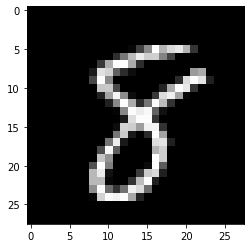

In [212]:
print(y_train[2])
plt.imshow(X_train[2], cmap = "gray")

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


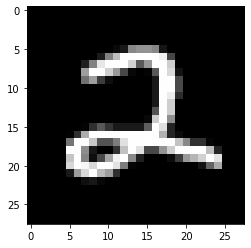

In [213]:
print(y_test[1])
plt.imshow(X_test[1], cmap = "gray")

### Modelos

##### Callbacks

In [214]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [215]:
callbacks = myCallback()

##### ANN

In [216]:
ann = Sequential([
    Flatten(input_shape = (28, 28, 1)),
    Dense(units = 128, activation = 'relu', kernel_initializer = GlorotUniform()),
    #Dense(units = 256, activation = 'relu', kernel_initializer = GlorotUniform()),
    Dense(units = 10, activation = 'softmax')
])

In [217]:
ann.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [218]:
ann.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_50 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [219]:
%%time
history = ann.fit(
                x = X_train, 
                y = y_train,
                epochs = 10,
                batch_size = 32,
                validation_split = 0.2,
                callbacks = [callbacks]
        )

Epoch 1/10
735/735 [==============================] - 4s 4ms/step - loss: 0.6368 - accuracy: 0.8214 - val_loss: 0.2198 - val_accuracy: 0.9327
Epoch 2/10
735/735 [==============================] - 3s 3ms/step - loss: 0.1855 - accuracy: 0.9469 - val_loss: 0.1565 - val_accuracy: 0.9507

Reached 95% accuracy so cancelling training!
Wall time: 6.1 s


In [220]:
ann.save('./models/MNIST_ann.h5')

##### CNN

In [221]:
cnn = Sequential([
    Conv2D(filters = 16, kernel_size = (3,3), input_shape = (28, 28, 1), activation = 'relu', kernel_initializer = GlorotUniform()),
    MaxPool2D(pool_size = (2,2)),
    #Con2D(filters = 32, kernel_size = (3,3), activation = 'relu', kernel_initializer = GlorotUniform()),
    #MaxPool2D(pool_size = (2,2)),
    Flatten(),
    Dense(units = 64, activation = 'relu', kernel_initializer = GlorotUniform()),
    Dense(units = 10, activation = 'softmax')
])

In [222]:
cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [223]:
cnn.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 2704)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 64)                173120    
_________________________________________________________________
dense_52 (Dense)             (None, 10)                650       
Total params: 173,930
Trainable params: 173,930
Non-trainable params: 0
_________________________________________________________________


In [224]:
cnn.fit(
     x = X_train
    ,y = y_train
    ,epochs = 10
    ,batch_size = 32
    ,validation_split = 0.2
    ,callbacks = [callbacks]
)

Epoch 1/10
735/735 [==============================] - 11s 6ms/step - loss: 0.5656 - accuracy: 0.8356 - val_loss: 0.1463 - val_accuracy: 0.9548
Epoch 2/10
735/735 [==============================] - 4s 5ms/step - loss: 0.1174 - accuracy: 0.9664 - val_loss: 0.1138 - val_accuracy: 0.9624

Reached 95% accuracy so cancelling training!


In [225]:
cnn.save('./models/MNIST_cnn.h5')

### Predicciones

In [312]:
def predictNumbers(model, X_test, y_test):
    probs = model.predict(X_test)
    class_prob = np.max(probs, axis = 1)
    predictions = np.argmax(probs, axis = 1)
    labels = np.argmax(y_test, axis = 1)
    match = predictions == labels
    
    results = pd.DataFrame({'Class_prediction': predictions, 'Class_prob': class_prob, 'Label': labels, 'Matches': match})
    return results, probs    

In [318]:
def sampleImagePredictions(results, data, title = ''):
    #indexes = np.random.choice(list(results.index), size = 9, replace = False)
    indexes = np.random.randint(0, len(results), 9)
    fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (8, 8))
    m = 0
    
    for i in range(0, 3):
        for j in range(0, 3):
            y_hat = results.loc[indexes[m], 'Class_prediction']
            y = results.loc[indexes[m], 'Label']
            axs[i, j].imshow(data[indexes[m]], cmap = "gray")
            axs[i, j].set_title('Model Prediction = {}\nReal Label = {}'.format(y_hat, y))
            m += 1
            
            
    fig.suptitle(title)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.show()
    return indexes

##### ANN Predictions

In [319]:
ann_results, ann_probs = predictNumbers(ann, X_test, y_test)

In [320]:
ann_probs

array([[4.9982496e-06, 4.5190002e-03, 9.8227388e-01, ..., 3.2014694e-05,
        1.6540482e-05, 1.0076710e-06],
       [6.5297005e-05, 2.5968675e-05, 9.9588948e-01, ..., 1.0870704e-03,
        1.9600436e-04, 4.3130069e-04],
       [9.9989057e-01, 2.0809305e-09, 9.6442488e-07, ..., 2.2177116e-07,
        4.8216572e-07, 8.6523163e-05],
       ...,
       [3.7481252e-05, 3.9558028e-08, 8.1205319e-05, ..., 1.7419973e-02,
        8.4191306e-05, 9.6320021e-01],
       [1.9105400e-01, 4.7330070e-07, 4.8311587e-04, ..., 2.8552578e-05,
        8.2726211e-07, 4.9570990e-05],
       [7.9943180e-05, 1.0829632e-03, 4.3441539e-04, ..., 1.8290271e-03,
        3.7166469e-03, 2.0171940e-01]], dtype=float32)

In [321]:
ann_results

,Class_prediction,Class_prob,Label,Matches
0,2,0.982274,2,True
1,2,0.995889,2,True
2,0,0.999891,0,True
3,9,0.999353,9,True
4,4,0.814407,4,True
...,...,...,...,...
12595,7,0.604340,7,True
12596,8,0.970175,8,True
12597,9,0.963200,9,True
12598,6,0.786332,6,True


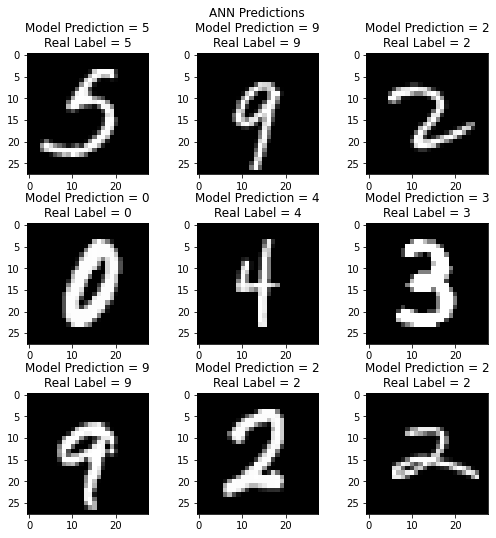

array([ 2893, 11236,  1350, 10426,   350,  1693,  7831, 10389, 11396])

In [323]:
sampleImagePredictions(ann_results, X_test, 'ANN Predictions')

In [327]:
accuracy = ann_results['Matches'].sum() / ann_results['Matches'].count()
print("Model ANN Accuracy = {}".format(accuracy))

Model ANN Accuracy = 0.9536507936507936


##### CNN Predictions

In [328]:
cnn_results, cnn_probs = predictNumbers(cnn, X_test, y_test)

In [329]:
cnn_probs

array([[1.0663961e-07, 1.1841359e-02, 9.7218567e-01, ..., 2.6412292e-05,
        1.4349559e-05, 2.5567707e-07],
       [1.6210261e-06, 9.3368112e-07, 9.9891877e-01, ..., 9.1991003e-04,
        3.4801255e-05, 5.3907303e-07],
       [9.9976820e-01, 1.2829258e-10, 5.1996494e-07, ..., 6.0099308e-09,
        3.5606902e-06, 2.2265557e-04],
       ...,
       [3.3908549e-05, 5.2692013e-07, 2.8673207e-04, ..., 2.3029903e-02,
        4.1755411e-04, 9.5796508e-01],
       [1.0240996e-01, 1.3382606e-07, 5.0501727e-05, ..., 2.2224986e-05,
        3.2782813e-05, 1.6724951e-04],
       [3.3541442e-06, 7.8637508e-04, 5.7711772e-05, ..., 3.0550538e-05,
        7.6131092e-04, 8.0181761e-03]], dtype=float32)

In [330]:
cnn_results

,Class_prediction,Class_prob,Label,Matches
0,2,0.972186,2,True
1,2,0.998919,2,True
2,0,0.999768,0,True
3,9,0.999882,9,True
4,4,0.943255,4,True
...,...,...,...,...
12595,9,0.632580,7,False
12596,8,0.980641,8,True
12597,9,0.957965,9,True
12598,6,0.892099,6,True


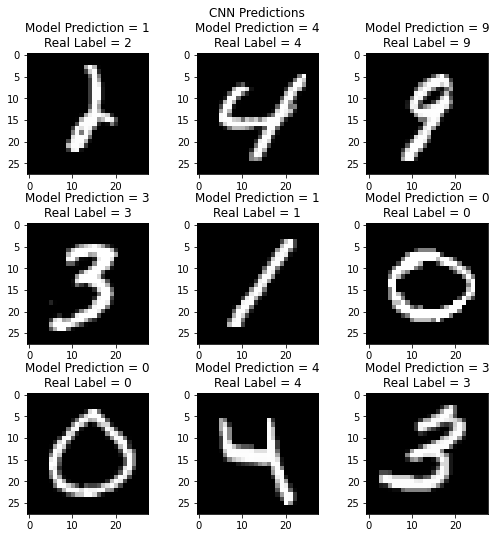

array([  925, 12096,  1720,  3829,  3711,  2671, 10423,  5103,  9447])

In [331]:
sampleImagePredictions(cnn_results, X_test, 'CNN Predictions')

In [332]:
accuracy = cnn_results['Matches'].sum() / cnn_results['Matches'].count()
print("Model CNN Accuracy = {}".format(accuracy))

Model CNN Accuracy = 0.9641269841269842


### Conclusiones
- El modelo entrenado por medio de CNN presenta una acierto mayor que el modelo de ANN con valores de 96.41% y 95.37% respectivamente